# Installation

- Run these commands

    - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

    - cd Monk_Object_Detection/1_gluoncv_finetune/installation

- Select the right requirements file and run

    - cat requirements_cuda10.1.txt | xargs -n 1 -L 1 pip install

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
# For colab use the command below
#! cd Monk_Object_Detection/1_gluoncv_finetune/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install


# For Local systems and cloud select the right CUDA version
!cd Monk_Object_Detection/1_gluoncv_finetune/installation && cat requirements_cuda10.1 | xargs -n 1 -L 1 pip install

# Training
No need for data conversion as the pipeline takes Monk format as input

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/1_gluoncv_finetune/lib/");

In [2]:
from detector_prototype import Detector

In [3]:
gtf = Detector();

In [4]:
root = "Document_Layout_Analysis/";
img_dir = "Images/";
anno_file = "train_labels.csv";
batch_size=2;

In [5]:
gtf.Dataset(root, img_dir, anno_file, batch_size=batch_size);

In [6]:
#vgg16 architecture, with atrous convolutions, pretrained on COCO dataset is used for this task
pretrained = True;         
gpu=True;
model_name = "ssd_512_vgg16_atrous_coco";

In [7]:
gtf.Model(model_name, use_pretrained=pretrained, use_gpu=gpu);

In [8]:
#learning rate 0.003 gave NaN values
gtf.Set_Learning_Rate(0.001);

In [9]:
epochs=5;
params_file = "saved_model.params";

In [10]:
gtf.Train(epochs, params_file);

[Epoch 0][Batch 0], Speed: 0.125 samples/sec, CrossEntropy=18.632, SmoothL1=16.625
[Epoch 0][Batch 20], Speed: 0.685 samples/sec, CrossEntropy=12.828, SmoothL1=9.465
[Epoch 0][Batch 40], Speed: 1.246 samples/sec, CrossEntropy=11.652, SmoothL1=8.289
[Epoch 0][Batch 60], Speed: 1.193 samples/sec, CrossEntropy=10.624, SmoothL1=8.060
[Epoch 0][Batch 80], Speed: 1.659 samples/sec, CrossEntropy=9.694, SmoothL1=7.959
[Epoch 0][Batch 100], Speed: 1.552 samples/sec, CrossEntropy=8.853, SmoothL1=7.611
[Epoch 0][Batch 120], Speed: 1.080 samples/sec, CrossEntropy=8.202, SmoothL1=7.467
[Epoch 0][Batch 140], Speed: 1.260 samples/sec, CrossEntropy=7.696, SmoothL1=7.207
[Epoch 0][Batch 160], Speed: 1.495 samples/sec, CrossEntropy=7.293, SmoothL1=6.968
[Epoch 0][Batch 180], Speed: 1.434 samples/sec, CrossEntropy=6.956, SmoothL1=7.076
[Epoch 0][Batch 200], Speed: 0.913 samples/sec, CrossEntropy=6.706, SmoothL1=6.935
[Epoch 0][Batch 220], Speed: 0.609 samples/sec, CrossEntropy=6.481, SmoothL1=6.735
[Epoc

[Epoch 2][Batch 180], Speed: 0.675 samples/sec, CrossEntropy=2.951, SmoothL1=3.910
[Epoch 2][Batch 200], Speed: 1.253 samples/sec, CrossEntropy=2.929, SmoothL1=3.942
[Epoch 2][Batch 220], Speed: 1.047 samples/sec, CrossEntropy=2.921, SmoothL1=3.930
[Epoch 2][Batch 240], Speed: 1.041 samples/sec, CrossEntropy=2.926, SmoothL1=3.933
[Epoch 2][Batch 260], Speed: 1.242 samples/sec, CrossEntropy=2.911, SmoothL1=3.888
[Epoch 2][Batch 280], Speed: 0.880 samples/sec, CrossEntropy=2.897, SmoothL1=3.787
[Epoch 2][Batch 300], Speed: 0.852 samples/sec, CrossEntropy=2.906, SmoothL1=3.763
[Epoch 2][Batch 320], Speed: 0.714 samples/sec, CrossEntropy=2.894, SmoothL1=3.691
[Epoch 2][Batch 340], Speed: 1.556 samples/sec, CrossEntropy=2.892, SmoothL1=3.726
[Epoch 2][Batch 360], Speed: 0.809 samples/sec, CrossEntropy=2.886, SmoothL1=3.739
[Epoch 2][Batch 380], Speed: 0.625 samples/sec, CrossEntropy=2.889, SmoothL1=3.791
[Epoch 2][Batch 400], Speed: 0.635 samples/sec, CrossEntropy=2.897, SmoothL1=3.766
[Epo

[Epoch 4][Batch 360], Speed: 0.747 samples/sec, CrossEntropy=2.726, SmoothL1=3.215
[Epoch 4][Batch 380], Speed: 0.687 samples/sec, CrossEntropy=2.728, SmoothL1=3.189
[Epoch 4][Batch 400], Speed: 1.223 samples/sec, CrossEntropy=2.731, SmoothL1=3.198
[Epoch 4][Batch 420], Speed: 1.388 samples/sec, CrossEntropy=2.732, SmoothL1=3.216
[Epoch 4][Batch 440], Speed: 0.798 samples/sec, CrossEntropy=2.730, SmoothL1=3.194
[Epoch 4][Batch 460], Speed: 0.938 samples/sec, CrossEntropy=2.729, SmoothL1=3.201
[Epoch 4][Batch 480], Speed: 0.914 samples/sec, CrossEntropy=2.723, SmoothL1=3.195
[Epoch 4][Batch 500], Speed: 1.382 samples/sec, CrossEntropy=2.725, SmoothL1=3.192
[Epoch 4][Batch 520], Speed: 1.672 samples/sec, CrossEntropy=2.724, SmoothL1=3.172
[Epoch 4][Batch 540], Speed: 1.419 samples/sec, CrossEntropy=2.722, SmoothL1=3.168
[Epoch 4][Batch 560], Speed: 0.449 samples/sec, CrossEntropy=2.729, SmoothL1=3.197
[Epoch 4][Batch 580], Speed: 0.882 samples/sec, CrossEntropy=2.726, SmoothL1=3.200
[Epo

# Inference

In [11]:
import os
import sys
sys.path.append("Monk_Object_Detection/1_gluoncv_finetune/lib/");

In [12]:
from inference_prototype import Infer

In [41]:
model_name = "ssd_512_vgg16_atrous_coco";
params_file = "saved_model.params";
class_list = ["caption", "paragraph", "credit", "drop-capital", "floating", "image", "frame", "heading", "header", "graphics", "footer", "linedrawing", "maths", "noise", "page-number", "chart", "separator", "table"];

In [42]:
gtf = Infer(model_name, params_file, class_list, use_gpu=True);

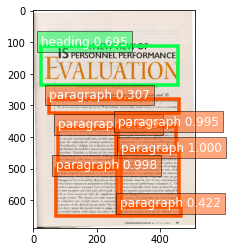

<Figure size 432x288 with 0 Axes>

In [48]:
img_name = "PRImA_Layout_Analysis_Dataset/Test_Images/test1.jpg"; 
visualize = True;
thresh = 0.3;
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

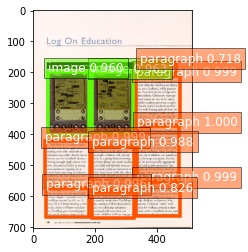

<Figure size 432x288 with 0 Axes>

In [44]:
img_name = "PRImA_Layout_Analysis_Dataset/Test_Images/test2.jpg"; 
visualize = True;
thresh = 0.7;
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

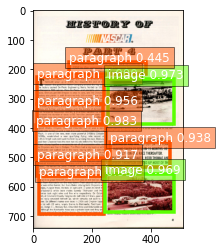

<Figure size 432x288 with 0 Axes>

In [45]:
img_name = "PRImA_Layout_Analysis_Dataset/Test_Images/test3.jpg"; 
visualize = True;
thresh = 0.4;
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

The model is performing well in identifying objects with very high confidence but it is biased a lot towards paragraphs. Its performance can be improved by using bigger batch size, training for more epochs and more data augmentation techniques to reduce bias.